In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
filename = '../../data/NASA Near-Earth Objects-CleanbyThang.csv'
df = pd.read_csv(filename)

In [21]:
# chuyển đổi các biến phân loại thành dạng category
df['orbit_class_type'] = df['orbit_class_type'].astype('category')
#chuyển ngày thành dạng datetime
df['first_observation_date'] = pd.to_datetime(df['first_observation_date'])
df['last_observation_date'] = pd.to_datetime(df['last_observation_date'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   id                                 24000 non-null  int64         
 1   absolute_magnitude_h               24000 non-null  float64       
 2   is_potentially_hazardous_asteroid  24000 non-null  bool          
 3   is_sentry_object                   24000 non-null  bool          
 4   kilometers_estimated_diameter_min  24000 non-null  float64       
 5   kilometers_estimated_diameter_max  24000 non-null  float64       
 6   orbit_class_type                   24000 non-null  category      
 7   perihelion_distance                24000 non-null  float64       
 8   aphelion_distance                  24000 non-null  float64       
 9   first_observation_date             24000 non-null  datetime64[ns]
 10  last_observation_date             

# biểu diễn các biến phân loại

# biến orbit_class_type

In [23]:
# biến orbit class type 
print(df['orbit_class_type'].value_counts()) 

orbit_class_type
APO    13245
AMO     8921
ATE     1812
IEO       22
Name: count, dtype: int64


<Axes: xlabel='is_sentry_object', ylabel='count'>

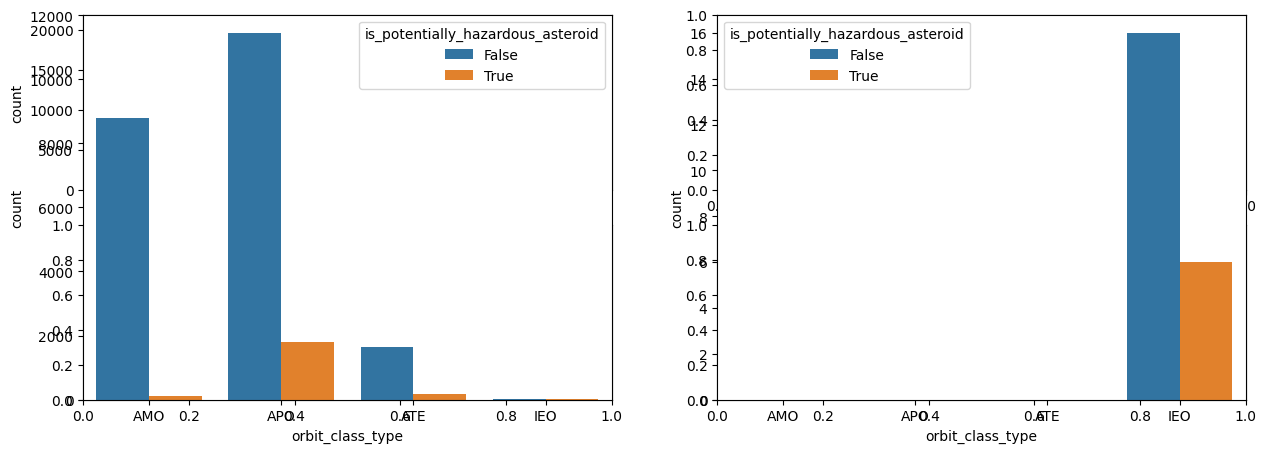

In [24]:
# vẽ biểu đồ cột cho biến orbit class type


plt.subplots(ncols=2, figsize=(15, 5),nrows=2)
plt.subplot(1, 2,1)
sns.countplot(x='orbit_class_type', data=df,hue='is_potentially_hazardous_asteroid')

plt.subplot(1, 2,2)
sns.countplot(data =df[df['orbit_class_type']=='IEO' ], x='orbit_class_type',hue='is_potentially_hazardous_asteroid')

plt.subplot(2, 2,1)
sns.countplot(data=df,x='is_sentry_object',hue='is_potentially_hazardous_asteroid')


# biến is_sentry_object
  

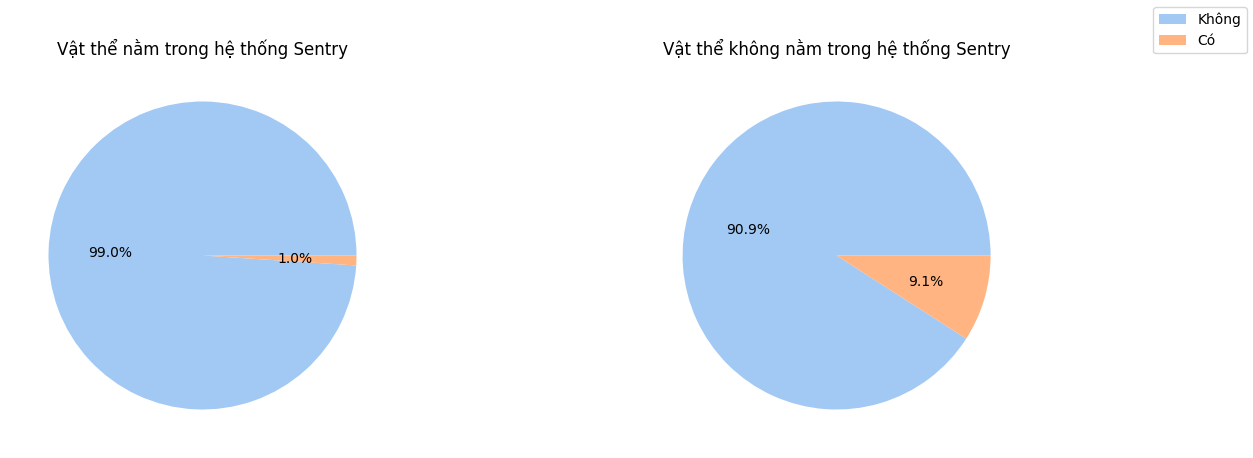

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

color = sns.color_palette("pastel")

fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

# các vật thể nằm trong hệ thống Sentry
df1 = df[df['is_sentry_object'] == True]
axs[0].pie(df1['is_potentially_hazardous_asteroid'].value_counts(), autopct='%1.1f%%', colors=color)
axs[0].set_title('Vật thể nằm trong hệ thống Sentry')

# các vật thể không nằm trong hệ thống Sentry
df2 = df[df['is_sentry_object'] == False]
axs[1].pie(df2['is_potentially_hazardous_asteroid'].value_counts(), autopct='%1.1f%%', colors=color)
axs[1].set_title('Vật thể không nằm trong hệ thống Sentry')


fig.legend(['Không', 'Có'], loc='upper right')

plt.show()


 đánh giá biến orbit class type:
- tỉ lệ là vật thể nguy hiểm trong mỗi loại quỹ đạo là khác nhau, đối với loại IEO tỉ lệ vật thể nguy hiểm cao hơn so với các loại khác
- loại quỹ đạo AMO có tỉ lệ vật thể nguy hiểm thấp nhất
=> biến orbit class type ảnh hưởng đến biến is_potentially_hazardous_asteroid

đánh giá biến is Sentry Object: 
- đối với các vật thể không nằm trong hệ theo dõi sentry thì có 9,1% là vật thể nguy hiểm 
- đỏi với các vật thể nằm trong hệ theo dõi sentry thì có 1% là vật thể nguy hiểm 

In [26]:
numeric_col = ['absolute_magnitude_h','is_potentially_hazardous_asteroid']

In [27]:
numeric_col = df.select_dtypes(include=['float64', 'int64']).columns
numeric_col =df[numeric_col].drop('id', axis=1).select_dtypes(include=['float64', 'int64']).columns
df[numeric_col].describe()

,absolute_magnitude_h,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,perihelion_distance,aphelion_distance
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,22.942893,0.167764,0.375131,0.915225,2.653104
std,2.952574,0.292966,0.655093,0.232201,4.468233
min,12.580000,-0.082130,-0.183647,0.070431,0.653754
25%,20.657500,0.024241,0.054205,0.785150,1.706281
50%,23.200000,0.060891,0.136157,0.965325,2.480109
75%,25.200000,0.197040,0.440595,1.068984,3.397965
max,33.200000,8.101305,18.115068,1.299988,631.895456


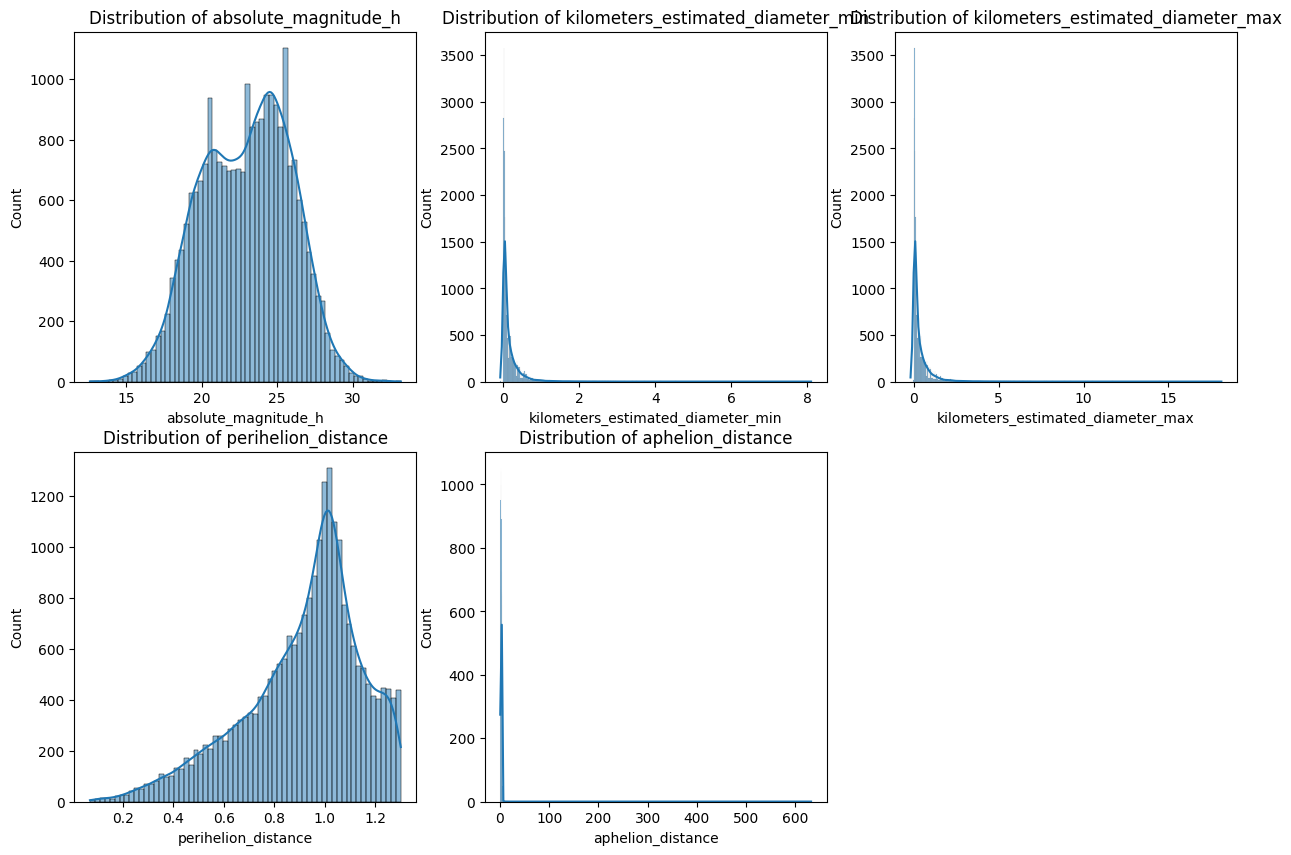

In [28]:
# vẽ đồ thị biểu diễn phân bố của các biến số
Figure, Axes = plt.subplots(ncols=3,nrows=2 ,figsize=(15, 10))

for idx, col in enumerate(numeric_col):
    sns.histplot(data=df, x=col, kde=True, ax=Axes[idx//3, idx%3])
    Axes[idx//3, idx%3].set_title(f'Distribution of {col}')
# disable the empty subplot
Axes[-1, -1].axis('off')
plt.show()


1. absolute_magnitude_h
- Phân tích: Phân bố khá đối xứng với đỉnh cao nhất nằm trong khoảng từ 22 đến 25. Có một số giá trị nằm ngoài biên độ nhưng không quá nhiều, cho thấy đây là một phân phối tương đối chuẩn.
- Ý nghĩa: Biến này đại diện cho độ sáng tuyệt đối của các NEO (Near Earth Objects). Phần lớn NEO có độ sáng nằm trong phạm vi phổ biến (22–25), một số ít rất sáng hoặc rất mờ.
2. kilometers_estimated_diameter_min
- Phân tích: Phân phối lệch về bên trái (skewed right), với hầu hết các giá trị rất nhỏ (gần 0). Rất ít đối tượng có đường kính lớn hơn 2 km.
- Ý nghĩa: Phần lớn các NEO có đường kính ước tính tối thiểu rất nhỏ, chỉ một số rất ít có kích thước đáng kể.
3. kilometers_estimated_diameter_max
- Phân tích: Tương tự kilometers_estimated_diameter_min, phân phối lệch phải và phần lớn dữ liệu tập trung ở giá trị gần 0. Một số ít có đường -- kính tối đa rất lớn (đến 15 km).
- Ý nghĩa: Đường kính tối đa của phần lớn NEO nhỏ, chỉ một vài đối tượng vượt trội về kích thước.
4. perihelion_distance
- Phân tích: Phân phối tương đối lệch phải nhưng có dạng phân tán đồng đều hơn so với các biến khác. Đỉnh nằm ở khoảng 0.7–0.8 AU.
- Ý nghĩa: Đây là khoảng cách gần Mặt Trời nhất của các NEO. Phần lớn các NEO tiếp cận ở khoảng cách 0.7–0.8 AU, nhưng có một số tiếp cận rất gần.
5. aphelion_distance
- Phân tích: Phân phối cực kỳ lệch phải, với phần lớn các giá trị nằm gần 0 và một số rất ít giá trị cực lớn (tới hơn 600 AU).
- Ý nghĩa: Đây là khoảng cách xa Mặt Trời nhất. Một số NEO có quỹ đạo rất dài và xa, nhưng đa số nằm gần hơn.


# kiểm tra ngoại lệ cho các biến liên tục

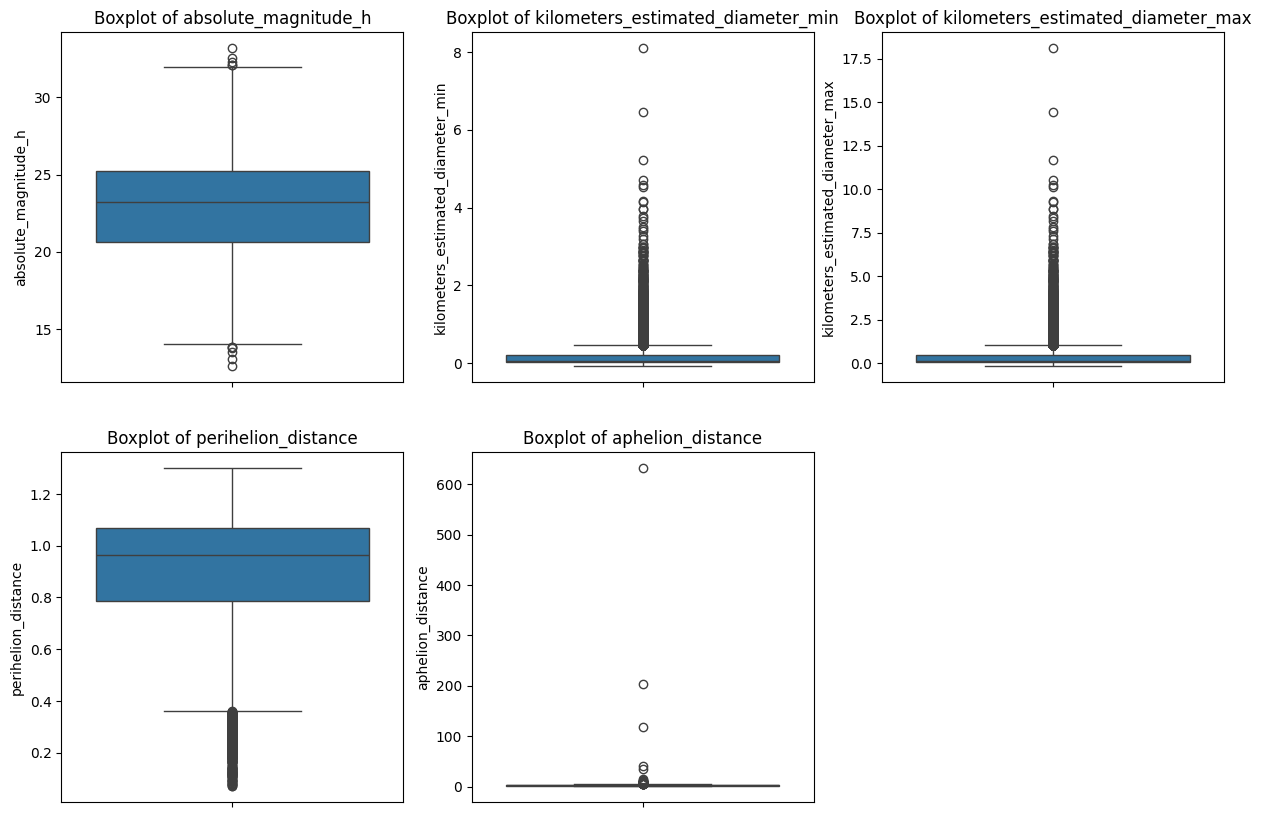

In [29]:
Figure, Axes = plt.subplots(ncols=3,nrows=2 ,figsize=(15, 10))

for idx, col in enumerate(numeric_col):
    sns.boxplot(data=df, y=col, ax=Axes[idx//3, idx%3])
    Axes[idx//3, idx%3].set_title(f'Boxplot of {col}')
# disable the empty subplot
Axes[-1, -1].axis('off')
plt.show()

In [30]:
# tính số lượng giá trị ngoại lai cho từng biến
Q1 = df[numeric_col].quantile(0.25)
Q3 = df[numeric_col].quantile(0.75)
IQR = Q3 - Q1
outliers = (df[numeric_col] < (Q1 - 1.5 * IQR)) | (df[numeric_col] > (Q3 + 1.5 * IQR))
print(outliers.sum())

absolute_magnitude_h                   11
kilometers_estimated_diameter_min    2135
kilometers_estimated_diameter_max    2135
perihelion_distance                   576
aphelion_distance                      61
dtype: int64


nhận xét ngoài absoulte_magnitude_h có ít các giá trị ngoại lai , còn lại đều có nhiều giá trị ngoại lai

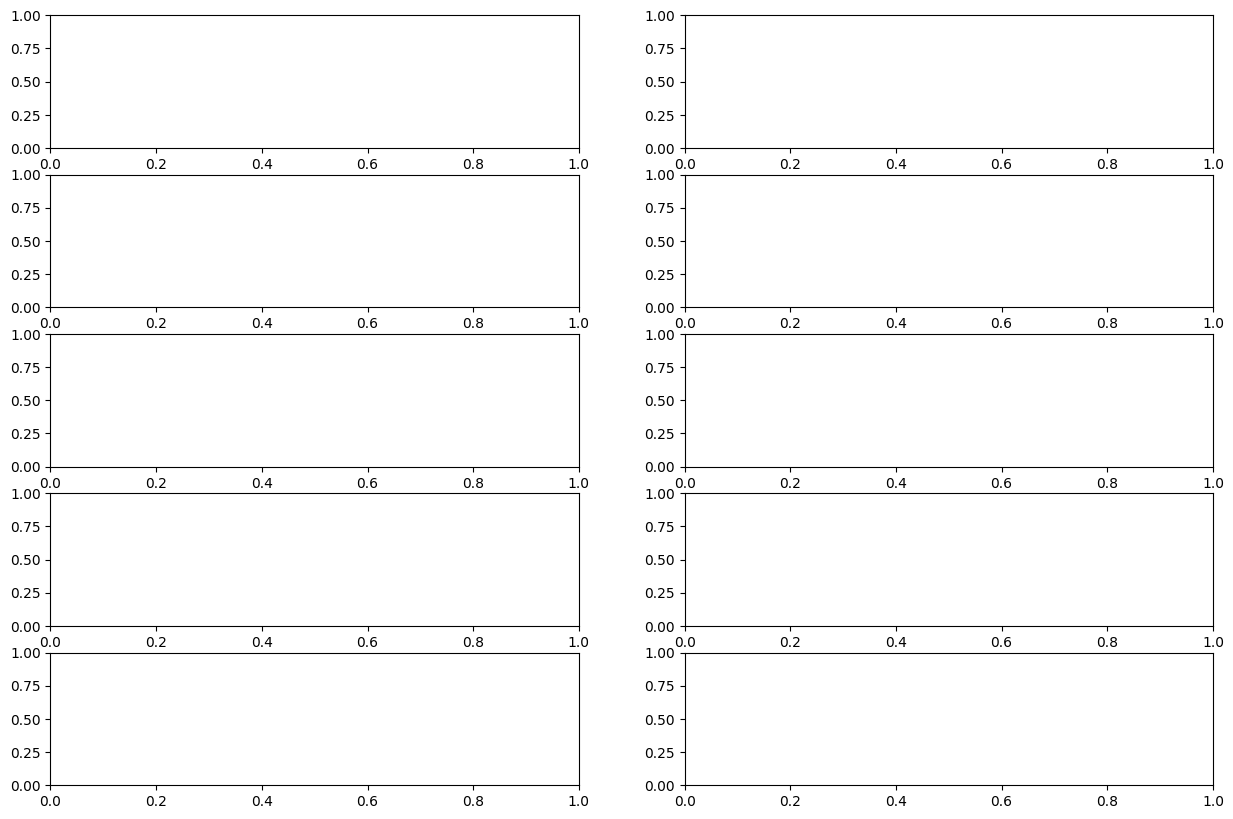

In [31]:
# phương án xử lí, vẽ hai đồ thị phân bố 1 cho các giá trị ngoại lại, và cái còn lại cho các giá trị không ngoại lai
Figure, Axes = plt.subplots(ncols=2,nrows=5 ,figsize=(15, 10))


plt.show()



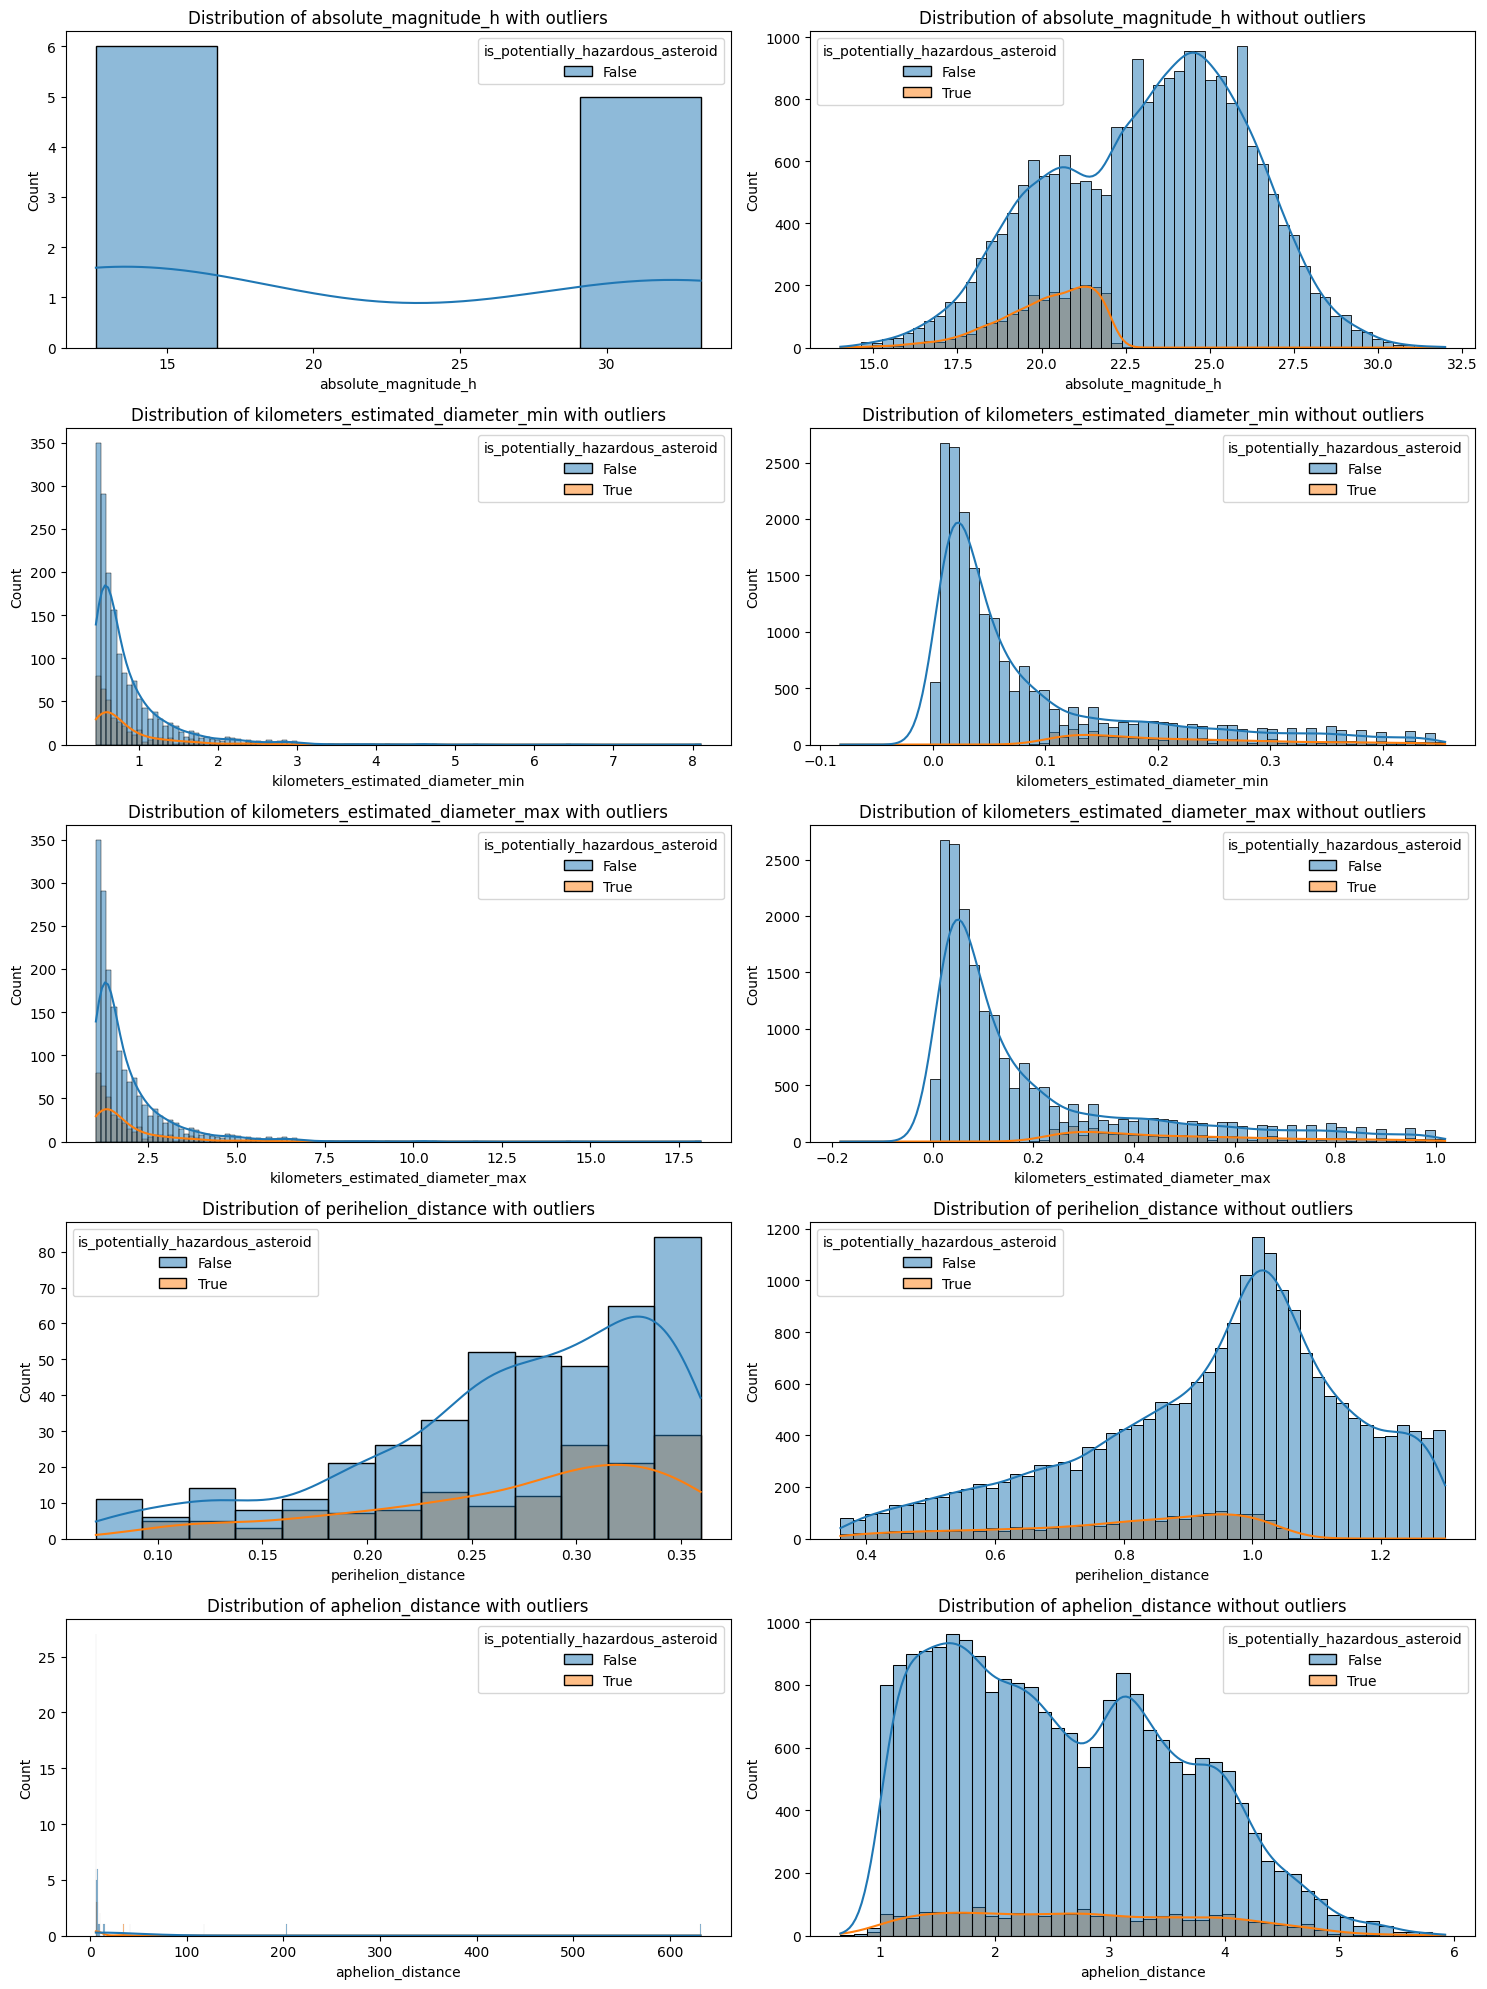

In [32]:
# phương án xử lí, vẽ hai đồ thị phân bố 1 cho các giá trị ngoại lai, và cái còn lại cho các giá trị không ngoại lai
Figure, Axes = plt.subplots(ncols=2, nrows=5, figsize=(15, 20))

for idx, col in enumerate(numeric_col):
    sns.histplot(data=df[outliers[col]], x=col, kde=True, ax=Axes[idx, 0],hue='is_potentially_hazardous_asteroid')
    Axes[idx, 0].set_title(f'Distribution of {col} with outliers')
    
    sns.histplot(data=df[~outliers[col]], x=col, kde=True, ax=Axes[idx, 1],hue='is_potentially_hazardous_asteroid')
    Axes[idx, 1].set_title(f'Distribution of {col} without outliers')
    

plt.tight_layout()
plt.show()

# phân tích cột absolute_magnitude_h

In [33]:
df[outliers['absolute_magnitude_h']]


,id,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_class_type,perihelion_distance,aphelion_distance,first_observation_date,last_observation_date,orbit_class_description
11,2002212,13.53,False,False,5.230642,11.696071,APO,0.351224,3.967846,1978-09-27,2022-03-14,Near-Earth asteroid orbits which cross the Ear...
28,2003552,13.07,False,False,6.464798,14.455728,AMO,1.242293,7.284240,1983-09-10,2022-02-20,Near-Earth asteroid orbits similar to that of ...
60,2004954,12.58,False,False,8.101305,18.115068,AMO,1.102690,2.900078,1975-06-07,2022-04-16,Near-Earth asteroid orbits similar to that of ...
71,2005587,13.82,False,False,4.576727,10.233872,AMO,1.092342,3.702341,1953-12-07,2021-11-11,Near-Earth asteroid orbits similar to that of ...
190,2020826,13.84,False,False,4.534767,10.140047,APO,0.884913,3.958582,1953-10-01,2021-12-29,Near-Earth asteroid orbits which cross the Ear...
208,2025916,13.76,False,False,4.704950,10.520587,AMO,1.286031,3.837188,1973-04-10,2022-04-15,Near-Earth asteroid orbits similar to that of ...
6211,3430497,33.20,False,False,0.000609,0.001362,APO,0.828235,3.016283,2008-10-09,2008-10-09,Near-Earth asteroid orbits which cross the Ear...
6230,3432678,32.10,False,False,0.001011,0.002260,APO,0.741715,3.933440,2008-10-22,2008-10-22,Near-Earth asteroid orbits which cross the Ear...
7958,3556206,32.10,False,False,0.001011,0.002260,ATE,0.664376,1.008332,2011-02-04,2011-02-04,Near-Earth asteroid orbits similar to that of ...
19352,3837685,32.30,False,True,0.000922,0.002061,APO,0.819099,1.876896,2019-01-08,2019-01-11,Near-Earth asteroid orbits which cross the Ear...


dựa vào bảng trên ta dễ dàng nhận thấy nếu các hàng là giá trị ngoại lại trong cột absolute_magnitude_h thì chúng có tỉ lệ 100% là các vật thể không nguy hiểm. Điều này có thể giúp chúng ta xác định được một số quy tắc để xác định vật thể có nguy cơ hay không dựa vào giá trị của cột này.

In [34]:
df.loc[(df['absolute_magnitude_h'] > 22.5) & (df['is_potentially_hazardous_asteroid'] == True)].count()

id                                   0
absolute_magnitude_h                 0
is_potentially_hazardous_asteroid    0
is_sentry_object                     0
kilometers_estimated_diameter_min    0
kilometers_estimated_diameter_max    0
orbit_class_type                     0
perihelion_distance                  0
aphelion_distance                    0
first_observation_date               0
last_observation_date                0
orbit_class_description              0
dtype: int64

<Axes: ylabel='kilometers_estimated_diameter_min'>

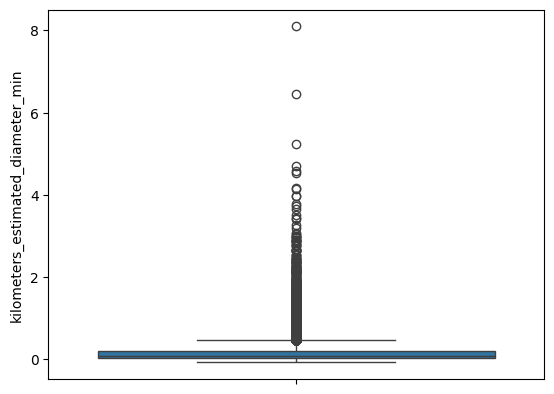

In [35]:

sns.boxplot(data=df,y='kilometers_estimated_diameter_min')

In [36]:
df['kilometers_estimated_diameter_min'].describe()

count    24000.000000
mean         0.167764
std          0.292966
min         -0.082130
25%          0.024241
50%          0.060891
75%          0.197040
max          8.101305
Name: kilometers_estimated_diameter_min, dtype: float64

 ở đây ta có một giá trị bị âm,nguyên nhân do bước điền dữ liệu, ta dự đoán cột này nên bị âm, xem xét ta nhận ra vật có kích thước quá nhỏ nên không phải là vật thể nguy hiểm
1. Xử lí chuyển thành 1 số rất nhỏ 0.0001
2. xóa dòng này vì nó không ảnh hưởng nhiều đến dữ liệu

In [44]:
# xóa các giá trị âm
df = df[df['kilometers_estimated_diameter_min'] >= 0]

In [49]:
df[outliers['kilometers_estimated_diameter_min']]['kilometers_estimated_diameter_min'].describe()

C:\Users\MSI VN\AppData\Local\Temp\ipykernel_17876\3529072409.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[outliers['kilometers_estimated_diameter_min']]['kilometers_estimated_diameter_min'].describe()


count    2135.000000
mean        0.862981
std         0.563041
min         0.457673
25%         0.542694
50%         0.667659
75%         0.965061
max         8.101305
Name: kilometers_estimated_diameter_min, dtype: float64

In [51]:
# tính tỉ lệ các vật thể tiềm ẩn nguy hiểm khi cột kilometer_estimated_diameter_min là giá trị ngoại lai
hazardous_ratio = df.loc[outliers['kilometers_estimated_diameter_min'], 'is_potentially_hazardous_asteroid'].mean()
print(f"Tỉ lệ các vật thể tiềm ẩn nguy hiểm khi cột kilometer_estimated_diameter_min là giá trị ngoại lai: {hazardous_ratio:.2%}")

# tính tỉ lệ các vật thể tiềm ẩn nguy hiểm khi cột kilometer_estimated_diameter_min không phải là giá trị ngoại lai
hazardous_ratio = df.loc[~outliers['kilometers_estimated_diameter_min'], 'is_potentially_hazardous_asteroid'].mean()
print(f"Tỉ lệ các vật thể tiềm ẩn nguy hiểm khi cột kilometer_estimated_diameter_min không phải là giá trị ngoại lai: {hazardous_ratio:.2%}")

Tỉ lệ các vật thể tiềm ẩn nguy hiểm khi cột kilometer_estimated_diameter_min là giá trị ngoại lai: 18.22%
Tỉ lệ các vật thể tiềm ẩn nguy hiểm khi cột kilometer_estimated_diameter_min không phải là giá trị ngoại lai: 7.80%


In [ ]:
# tính tỉ lệ các vật thể tiềm ẩn nguy hiểm khi cột kilometer_estimated_diameter_min là giá trị ngoại lai
df.loc[outliers['kilometers_estimated_diameter_min'], 'is_potentially_hazardous_asteroid'].mean()


In [52]:
from scipy.stats import chi2_contingency

# Replace 'column_name' and 'target_column' with the actual column names
contingency_table = pd.crosstab(outliers['absolute_magnitude_h'], df['is_potentially_hazardous_asteroid'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-squared: 0.2414303164146443
P-value: 0.6231749681957587
Degrees of freedom: 1
Expected frequencies:
[[2.18949598e+04 2.09304021e+03]
 [1.00402100e+01 9.59789991e-01]]


C:\Users\MSI VN\AppData\Local\Temp\ipykernel_17876\2299722210.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.scatterplot(data=df[outliers['kilometers_estimated_diameter_min']], x='kilometers_estimated_diameter_min', y='is_potentially_hazardous_asteroid')


<Axes: xlabel='kilometers_estimated_diameter_min', ylabel='is_potentially_hazardous_asteroid'>

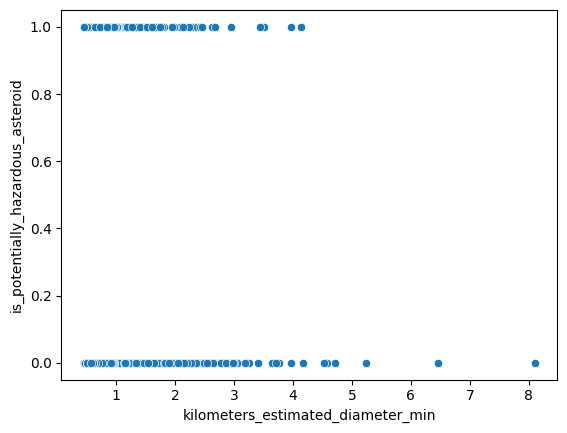

In [55]:
sns.scatterplot(data=df[outliers['kilometers_estimated_diameter_min']], x='kilometers_estimated_diameter_min', y='is_potentially_hazardous_asteroid')